In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chicken_df = pd.read_csv("Chicken.csv")

In [3]:
#CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHILLED & FROZEN - PRODUCTION, MEASURED IN LB
chicken_df

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2020,JAN,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CHICKENS,"CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHI...",TOTAL,NOT SPECIFIED,"111,989,000",NaN
1,SURVEY,2020,FEB,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CHICKENS,"CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHI...",TOTAL,NOT SPECIFIED,"92,908,000",NaN
2,SURVEY,2020,MAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CHICKENS,"CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHI...",TOTAL,NOT SPECIFIED,"111,990,000",NaN
3,SURVEY,2019,JAN,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CHICKENS,"CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHI...",TOTAL,NOT SPECIFIED,"98,080,000",NaN
4,SURVEY,2019,FEB,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CHICKENS,"CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHI...",TOTAL,NOT SPECIFIED,"83,331,000",NaN
5,SURVEY,2019,MAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CHICKENS,"CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHI...",TOTAL,NOT SPECIFIED,"93,414,000",NaN
6,SURVEY,2019,APR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CHICKENS,"CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHI...",TOTAL,NOT SPECIFIED,"97,052,000",NaN
7,SURVEY,2019,MAY,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CHICKENS,"CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHI...",TOTAL,NOT SPECIFIED,"110,646,000",NaN
8,SURVEY,2019,JUN,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CHICKENS,"CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHI...",TOTAL,NOT SPECIFIED,"98,487,000",NaN
9,SURVEY,2019,JUL,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CHICKENS,"CHICKENS, YOUNG, SLAUGHTER, FI, CERTIFIED, CHI...",TOTAL,NOT SPECIFIED,"109,842,000",NaN


In [4]:
chicken_df.isna().any()

Program             False
Year                False
Period              False
Week Ending          True
Geo Level           False
State               False
State ANSI          False
Ag District          True
Ag District Code     True
County               True
County ANSI          True
Zip Code             True
Region               True
watershed_code      False
Watershed            True
Commodity           False
Data Item           False
Domain              False
Domain Category     False
Value               False
CV (%)               True
dtype: bool

In [5]:
chicken_df.dtypes

Program              object
Year                  int64
Period               object
Week Ending         float64
Geo Level            object
State                object
State ANSI            int64
Ag District         float64
Ag District Code    float64
County              float64
County ANSI         float64
Zip Code            float64
Region              float64
watershed_code        int64
Watershed           float64
Commodity            object
Data Item            object
Domain               object
Domain Category      object
Value                object
CV (%)              float64
dtype: object

In [6]:
chicken_df['Value'] = chicken_df['Value'].replace({'\$': '', ',': ''}, regex=True)
chicken_df['Value'] = chicken_df['Value'].astype(int)


In [7]:
chicken_df = chicken_df[['Year', 'Period', 'Value']]
reserve = chicken_df.copy(deep = True)
reserve

,Year,Period,Value
0,2020,JAN,111989000
1,2020,FEB,92908000
2,2020,MAR,111990000
3,2019,JAN,98080000
4,2019,FEB,83331000
5,2019,MAR,93414000
6,2019,APR,97052000
7,2019,MAY,110646000
8,2019,JUN,98487000
9,2019,JUL,109842000


In [8]:
# Production from Jan 2020 going back to 2018 seems more or less consistent, no indication of significant decrease in production
# No data exists from Feb onwards -> relevant time frame.
chicken_df['Period'] = chicken_df['Period'].astype('str') + " " + chicken_df['Year'].astype('str')
chicken18df = chicken_df[chicken_df['Year'] == 2018]
chicken19df = chicken_df[chicken_df['Year'] == 2019]
chicken20df = chicken_df[chicken_df['Year'] == 2020]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


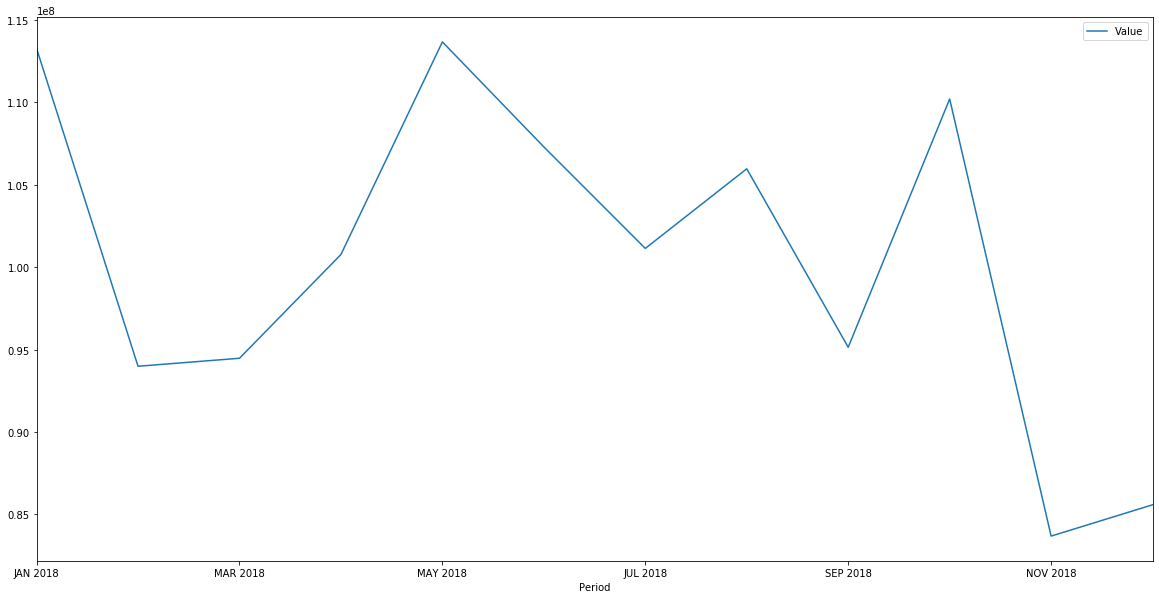

In [9]:
chicken18df.reset_index(inplace = True) 
chicken18df['Value'] = chicken18df['Value'].replace(',','', regex=True)
chicken18df['Value'] = chicken18df['Value'].astype(int)
chicken18df.plot.line(x='Period', y='Value', figsize=(20,10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


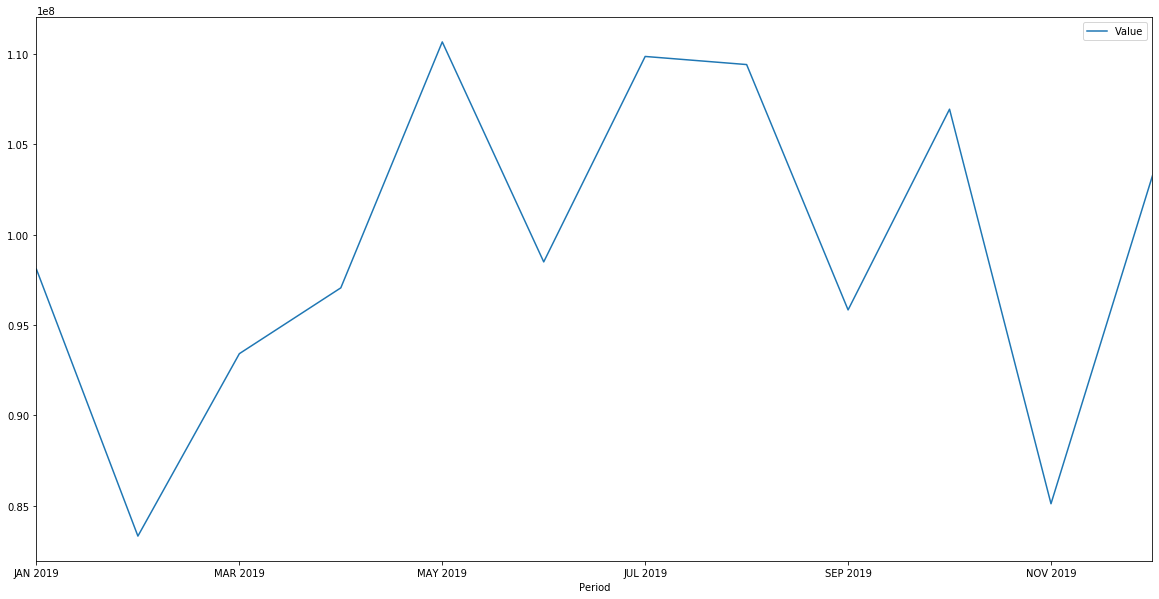

In [10]:
chicken19df.reset_index(inplace = True) 
chicken19df['Value'] = chicken19df['Value'].replace(',','', regex=True)
chicken19df['Value'] = chicken19df['Value'].astype(int)
chicken19df.plot.line(x='Period', y='Value', figsize=(20,10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


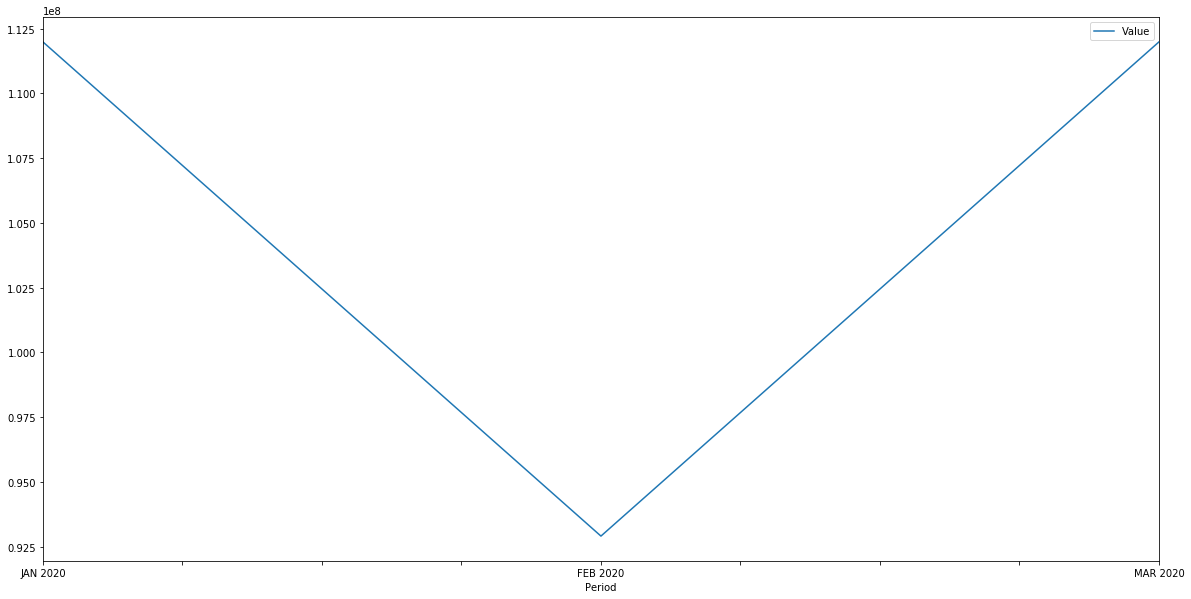

In [11]:
chicken20df.reset_index(inplace = True) 
chicken20df['Value'] = chicken20df['Value'].replace(',','', regex=True)
chicken20df['Value'] = chicken20df['Value'].astype(int)
chicken20df.plot.line(x='Period', y='Value', figsize=(20,10))

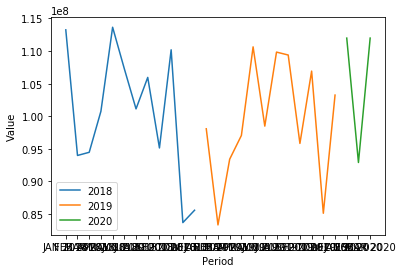

In [12]:
fig,ax = plt.subplots()

#for e in ['chicken18df','chicken19df','chicken20df']:
#    ax.plot(df[df.name==name].Period, df[df.name==name].Value, label=name)
ax.plot(chicken18df.Period, chicken18df.Value, label='2018')
ax.plot(chicken19df.Period, chicken19df.Value, label='2019')
ax.plot(chicken20df.Period, chicken20df.Value, label='2020')

ax.set_xlabel("Period")
ax.set_ylabel("Value")
ax.legend(loc='best')

In [13]:
def standardize_period(string):
    string = string.strip()
    if "JAN" == string:
        string = 1
    elif "FEB" == string:
        string = 2
    elif "MAR" == string:
        string = 3
    elif "APR" == string:
        string = 4
    elif "MAY" == string:
        string = 5
    elif "JUN" == string:
        string = 6
    elif "JUL" == string:
        string = 7
    elif "AUG" == string:
        string = 8
    elif "SEP" == string:
        string = 9
    elif "OCT" == string:
        string = 10
    elif "NOV" == string:
        string = 11
    elif "DEC" == string:
        string = 12
    return string

#reserve['Period'] = reserve['Period'].apply(standardize_period)
#reserve

,Year,Period,Value
0,2020,1,111989000
1,2020,2,92908000
2,2020,3,111990000
3,2019,1,98080000
4,2019,2,83331000
5,2019,3,93414000
6,2019,4,97052000
7,2019,5,110646000
8,2019,6,98487000
9,2019,7,109842000


/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


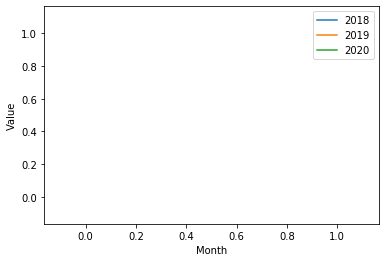

In [14]:
#fig,ax = plt.subplots()

#for name in ['2018','2019', '2020']:
#    ax.plot(reserve[reserve.Year==name].Period, reserve[reserve.Year==name].Value, label=name)
    
#ax.set_xlabel("Month")
#ax.set_ylabel("Value")
#ax.legend(loc='best')

In [15]:
reserve[reserve.Year == 2018].Period

15     1
16     2
17     3
18     4
19     5
20     6
21     7
22     8
23     9
24    10
25    11
26    12
Name: Period, dtype: int64

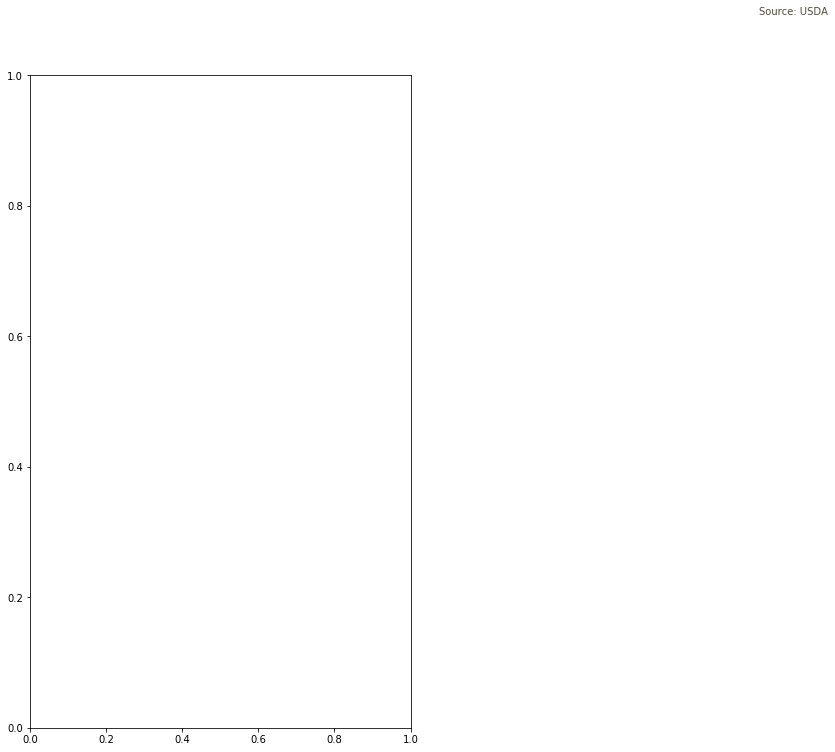

ValueError: x and y must have same first dimension, but have shapes (12, 3) and (0, 3)

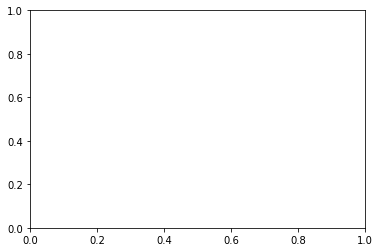

In [28]:
#select rows by year
plt.plot(reserve[reserve.Year == 2018], reserve[reserve.Value == 2018], label='2018')
plt.plot(reserve[reserve.Year == 2019], reserve[reserve.Value == 2019], label='2019')
plt.plot(reserve[reserve.Year == 2020], reserve[reserve.Value == 2019], label='2020')
# Add legend
plt.legend(loc='best')
# Add title and x, y labels
plt.title("Production in LBs by Month", fontsize=16, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Value")
plt.show()

In [25]:
plt.plot?